In [1]:
bayesian_hdx_dir = '../../pyext/src'

import sys
sys.path.append(bayesian_hdx_dir)
import scoring, sampling, system, model, hxio, tools, analysis

#from pyopenms import *
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [2]:
sequence = "MHHHHHHENLYFQSIKKIGVLTSGGDAPGMNAAIRGVVRSALTEGLEVMGIYDGYLGLYEDRMVQLDRYSVSDMINRGGTFLGSARFPEFRDENIRAVAIENLKKRGIDALVVIGGDGSYMGAMRLTEMGFPCIGLPGTIDNDIKGTDYTIGFFTALSTVVEAIDRLRDTSSSHQRISVVEVMGRYCGDLTLAAAIAGGCEFVVVPEVEFSREDLVNEIKAGIAKGKKHAIVAITEHMCDVDELAHFIEKETGRETRATVLGHIQRGGSPVPYDRILASRMGAYAIDLLLAGYGGRCVGIQNEQLVHHDIIDAIENMKRPFKGDWLDCAEKMY"
infile = "./bayesian_hdx_pfka_APO.dat"

In [3]:
dataset = hxio.import_HXcolumns(infile,
                                sequence,
                                name="APO",
                                percentD=False,
                                conditions=None,
                                error_estimate=1,
                                n_fastamides=0,
                                offset=0)


raw_spectra_path = '/Users/chenlin/Library/CloudStorage/OneDrive-Personal/Postdoc/EX/EX_CL-6-56/Biorep1_TechRep3_spectra/SpecExport/'

hxio.load_raw_ms_to_hdxms_data(dataset, raw_spectra_path)
tools.set_t0_rep_score(dataset)

Standard Conditions used.  Please modify these in the script if you are not at 293K and pH=7


/Users/chenlin/Library/CloudStorage/OneDrive-Personal/research_git/bayesian_hdx/v2/examples/pfka/../../pyext/src/data.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  fastest_logk = numpy.log10(-numpy.log(threshold)/first_time_point)


Done loading raw MS data.
Set score for 306 t0 replicates


In [17]:
p1 = np.array([0.1, 0.2, 0.3, 0.4])
p2 = np.array([0.1, 0.20, 0.3, 0.24])
tools.get_divergence(p1, p2, method='JS')


0.007271811868544132

In [89]:
%time
for i in range(1, 1000000):
    tools.get_divergence(x1, x2, method='KL')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


KeyboardInterrupt: 

In [4]:
[pep.get_best_charge_state() for pep in dataset.peptides]

[3,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 3,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1]

In [5]:
pep = dataset.peptides[10]

In [6]:
pep.best_t0_replicate.raw_ms

,m/z,Intensity
0,768.2866,0.000000
1,768.2899,0.000099
2,768.2933,0.003696
3,768.2967,0.009423
4,768.3000,0.010882
...,...,...
2989,778.3664,0.000000
2990,778.3698,0.000000
2991,778.3731,0.004986
2992,778.3765,0.004962


In [7]:
pep = dataset.peptides[122]

In [8]:
tools.get_isotope_envelope(pep.best_t0_replicate)['Intensity'].values

array([0.62423131, 0.34872533, 0.02704337])

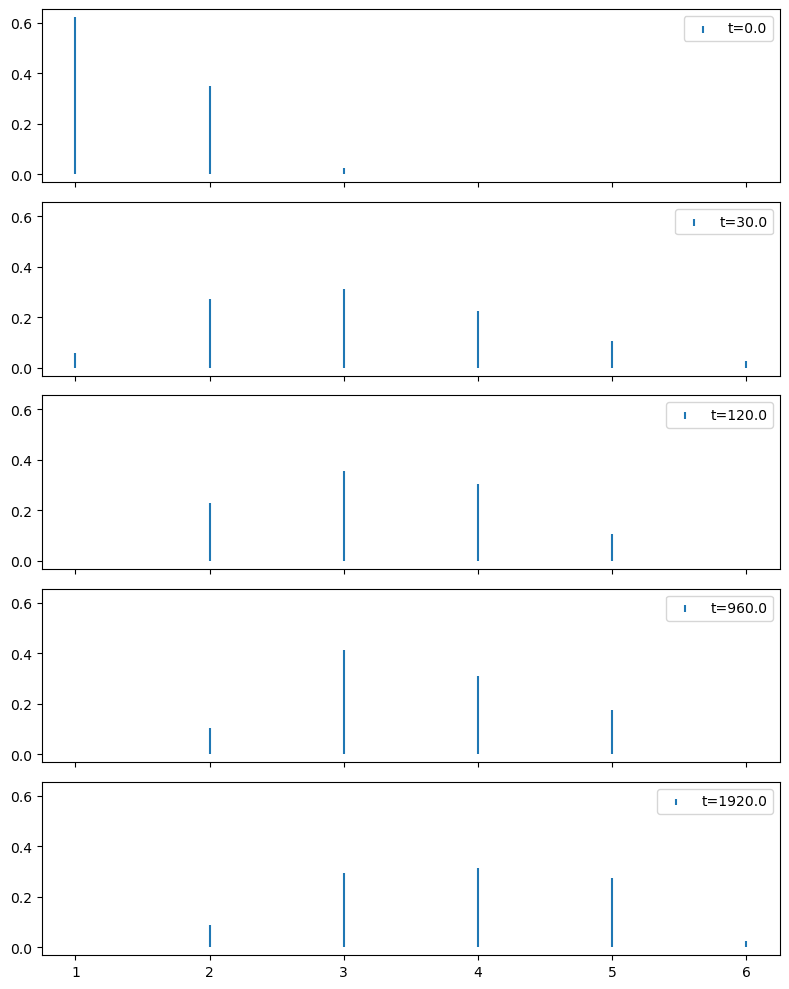

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 1,figsize=(8,10), sharex=True, sharey=True)

for i,rep in enumerate([rep for tp in pep.timepoints for rep in tp.get_replicates() if rep.charge_state == pep.best_charge_state][:5]):
    ax = axes.flatten()[i]

    isotope_envelope = tools.get_isotope_envelope(rep)
    ax.stem(isotope_envelope['m/z'],isotope_envelope['Intensity'], linefmt='-', markerfmt=' ', basefmt=" ", label=f't={rep.timepoint.time}')
    #sns.lineplot(x='m/z', y='Intensity', data=tp.raw_ms, linewidth=1.0)

    ax.legend()
    #ax.set_ylim(0, 0.3)


plt.tight_layout()